# Pandas - Python Data Analysis Library

# Case Study 2: Analysis Worlds's global COVID pandemic data using DataFrames

# Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import plotly.graph_objects as go
from fbprophet import Prophet
import plotly.express as px
import numpy as np
plt.style.use('fivethirtyeight')

# Introduction to the Dataset

In [2]:
dfT = pd.read_csv('Time Series-COVID-19-global-data-11.csv')

In [3]:
dfT.head()

day Country Country Name Region  Deaths  Cumulative Deaths  \
0  2020-02-24      AF  Afghanistan   EMRO       0                  0   
1  2020-02-25      AF  Afghanistan   EMRO       0                  0   
2  2020-02-26      AF  Afghanistan   EMRO       0                  0   
3  2020-02-27      AF  Afghanistan   EMRO       0                  0   
4  2020-02-28      AF  Afghanistan   EMRO       0                  0   

   Confirmed  Cumulative Confirmed  
0          1                     1  
1          0                     1  
2          0                     1  
3          0                     1  
4          0                     1

In [4]:
dfT.tail()

day Country Country Name Region  Deaths  Cumulative Deaths  \
15025  2020-05-10      ZW     Zimbabwe   AFRO       0                  4   
15026  2020-05-11      ZW     Zimbabwe   AFRO       0                  4   
15027  2020-05-12      ZW     Zimbabwe   AFRO       0                  4   
15028  2020-05-13      ZW     Zimbabwe   AFRO       0                  4   
15029  2020-05-14      ZW     Zimbabwe   AFRO       0                  4   

       Confirmed  Cumulative Confirmed  
15025          1                    35  
15026          1                    36  
15027          0                    36  
15028          1                    37  
15029          0                    37

In [5]:
dfT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15030 entries, 0 to 15029
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   day                   15030 non-null  object
 1   Country               14868 non-null  object
 2   Country Name          15030 non-null  object
 3   Region                14930 non-null  object
 4   Deaths                15030 non-null  int64 
 5   Cumulative Deaths     15030 non-null  int64 
 6   Confirmed             15030 non-null  int64 
 7   Cumulative Confirmed  15030 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 939.5+ KB


In [6]:
dfT.shape

(15030, 8)

In [7]:
dfT.isna().values.any()

True

In [8]:
dfT.isna().sum()

day                       0
Country                 162
Country Name              0
Region                  100
Deaths                    0
Cumulative Deaths         0
Confirmed                 0
Cumulative Confirmed      0
dtype: int64

In [77]:
dfT

day Country Country Name Region  Deaths  Cumulative Deaths  \
0      2020-02-24      AF  Afghanistan   EMRO       0                  0   
1      2020-02-25      AF  Afghanistan   EMRO       0                  0   
2      2020-02-26      AF  Afghanistan   EMRO       0                  0   
3      2020-02-27      AF  Afghanistan   EMRO       0                  0   
4      2020-02-28      AF  Afghanistan   EMRO       0                  0   
...           ...     ...          ...    ...     ...                ...   
15025  2020-05-10      ZW     Zimbabwe   AFRO       0                  4   
15026  2020-05-11      ZW     Zimbabwe   AFRO       0                  4   
15027  2020-05-12      ZW     Zimbabwe   AFRO       0                  4   
15028  2020-05-13      ZW     Zimbabwe   AFRO       0                  4   
15029  2020-05-14      ZW     Zimbabwe   AFRO       0                  4   

       Confirmed  Cumulative Confirmed  
0              1                     1  
1              0                     1  
2              0                     1  
3              0                     1  
4              0                     1  
...          ...                   ...  
15025          1                    35  
15026          1                    36  
15027          0                    36  
15028          1                    37  
15029          0                    37  

[15030 rows x 8 columns]

In [9]:
dfT.isnull().sum().sum()

262

In [10]:
dfT.nunique()

day                      125
Country                  214
Country Name             216
Region                     6
Deaths                   453
Cumulative Deaths       1395
Confirmed               1470
Cumulative Confirmed    4244
dtype: int64

In [11]:
df=dfT.copy()

In [12]:
df.drop(columns=['Country','Region'],inplace=True)

In [13]:
df.columns

Index(['day', 'Country Name', 'Deaths', 'Cumulative Deaths', 'Confirmed',
       'Cumulative Confirmed'],
      dtype='object')

In [14]:
df.isna().any()

day                     False
Country Name            False
Deaths                  False
Cumulative Deaths       False
Confirmed               False
Cumulative Confirmed    False
dtype: bool

In [15]:
df.isna().any().sum()

0

# Conversion of Datatypes

In [16]:
df['day']=pd.to_datetime(df['day'])

In [17]:
df.tail()

day Country Name  Deaths  Cumulative Deaths  Confirmed  \
15025 2020-05-10     Zimbabwe       0                  4          1   
15026 2020-05-11     Zimbabwe       0                  4          1   
15027 2020-05-12     Zimbabwe       0                  4          0   
15028 2020-05-13     Zimbabwe       0                  4          1   
15029 2020-05-14     Zimbabwe       0                  4          0   

       Cumulative Confirmed  
15025                    35  
15026                    36  
15027                    36  
15028                    37  
15029                    37

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15030 entries, 0 to 15029
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   day                   15030 non-null  datetime64[ns]
 1   Country Name          15030 non-null  object        
 2   Deaths                15030 non-null  int64         
 3   Cumulative Deaths     15030 non-null  int64         
 4   Confirmed             15030 non-null  int64         
 5   Cumulative Confirmed  15030 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 704.7+ KB


# Rename Column

In [19]:
df.rename(columns={'day':'ds'},inplace=True)

In [20]:
df.head(1)

ds Country Name  Deaths  Cumulative Deaths  Confirmed  \
0 2020-02-24  Afghanistan       0                  0          1   

   Cumulative Confirmed  
0                     1

In [21]:
df.ds.head()

0   2020-02-24
1   2020-02-25
2   2020-02-26
3   2020-02-27
4   2020-02-28
Name: ds, dtype: datetime64[ns]

# Extract Data only for as on Today

In [22]:
df.iloc[df.shape[0]-1]

ds                      2020-05-14 00:00:00
Country Name                       Zimbabwe
Deaths                                    0
Cumulative Deaths                         4
Confirmed                                 0
Cumulative Confirmed                     37
Name: 15029, dtype: object

In [23]:
df.iloc[df.shape[0]-1]['ds']

Timestamp('2020-05-14 00:00:00')

In [24]:
df_COVID_Today=df[df['ds']==df.iloc[df.shape[0]-1]['ds']]

In [25]:
df_COVID_Today.tail()

ds                        Country Name  Deaths  \
14768 2020-05-14  Venezuela (Bolivarian Republic of)       0   
14880 2020-05-14                            Viet Nam       0   
14915 2020-05-14                               Yemen       0   
14973 2020-05-14                              Zambia       0   
15029 2020-05-14                            Zimbabwe       0   

       Cumulative Deaths  Confirmed  Cumulative Confirmed  
14768                 10         18                   440  
14880                  0          0                   288  
14915                 13         15                    87  
14973                  7          5                   446  
15029                  4          0                    37

# Set Date Column as Index

In [26]:
df.set_index('ds',inplace=True)

# Extraction by Country Names

# Analysis by Region: India 

In [27]:
df_India=df[df['Country Name']=='India']

In [28]:
df_India.tail()

Country Name  Deaths  Cumulative Deaths  Confirmed  \
ds                                                              
2020-05-10        India     128               2109       3277   
2020-05-11        India      97               2206       4213   
2020-05-12        India      87               2293       3604   
2020-05-13        India     122               2415       3525   
2020-05-14        India     134               2549       3722   

            Cumulative Confirmed  
ds                                
2020-05-10                 62939  
2020-05-11                 67152  
2020-05-12                 70756  
2020-05-13                 74281  
2020-05-14                 78003

In [29]:
df_India.columns

Index(['Country Name', 'Deaths', 'Cumulative Deaths', 'Confirmed',
       'Cumulative Confirmed'],
      dtype='object')

In [30]:
df_India.shape

(106, 5)

# Visualizing India's COVID Case

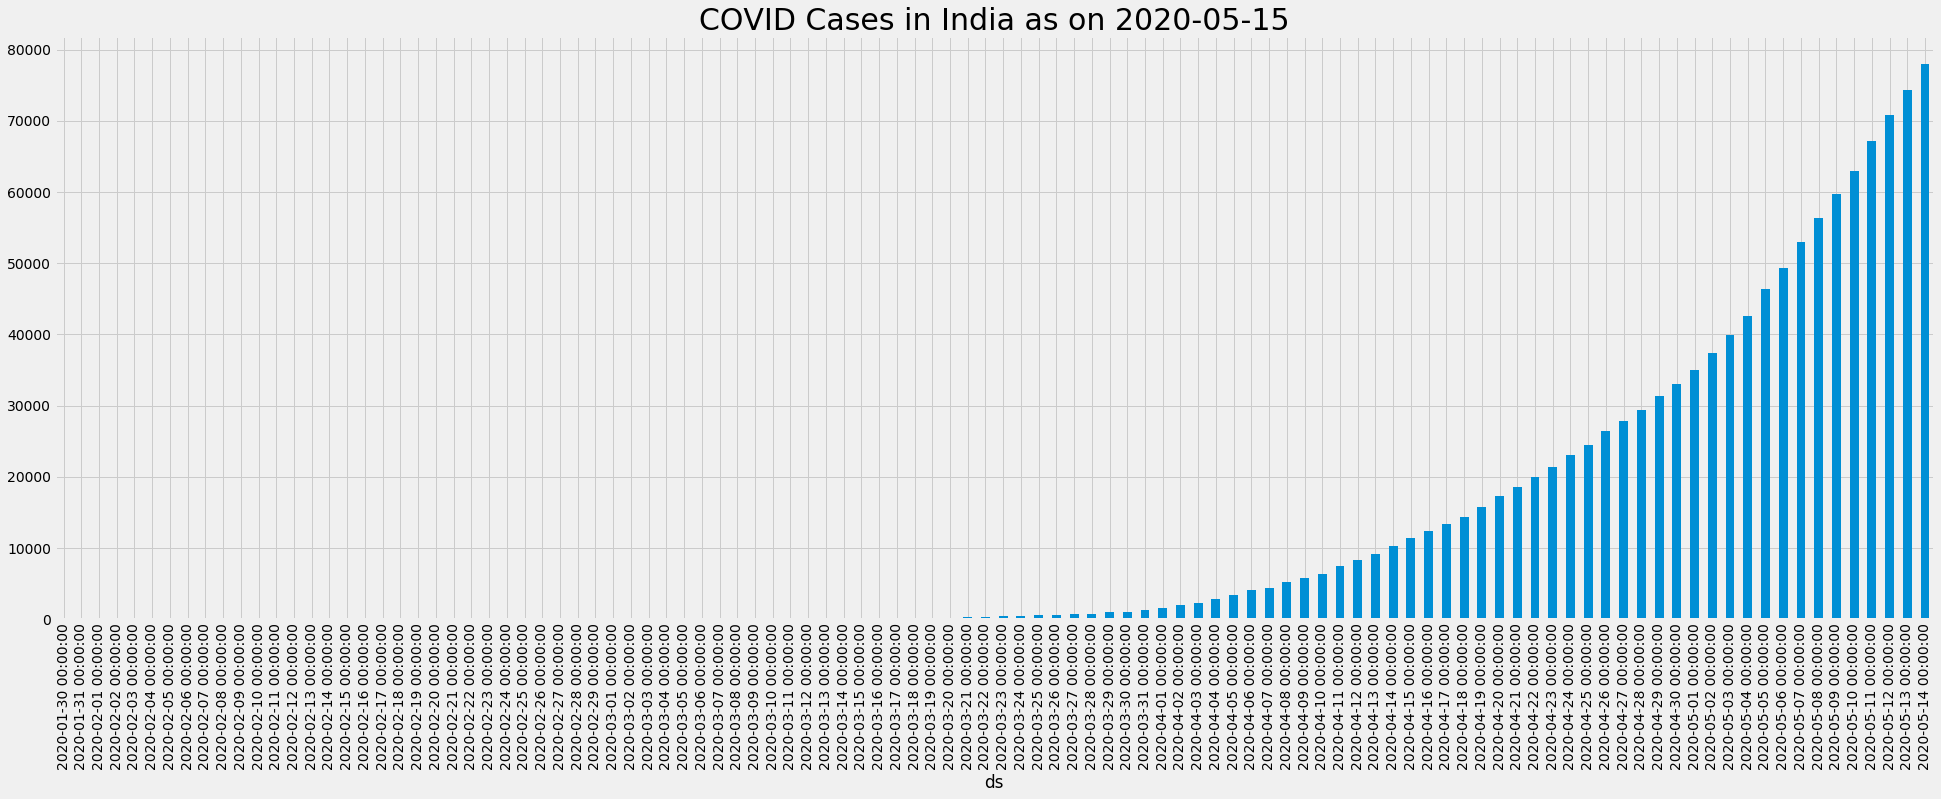

In [31]:
plt.figure(figsize=(30,10))
df_India['Cumulative Confirmed'].plot(kind='bar')
plt.title(f'COVID Cases in India as on {dt.date.today()}',fontsize=30)
plt.show()

In [32]:
fig = go.Figure([go.Scatter(x=df_India.index, y=df_India['Cumulative Confirmed'])])
fig.show()

In [33]:
import datetime
s=' India COVID Cumulative Confirmed '+str(datetime.date.today())
fig = px.line(df_India, x=df_India.index.values, y='Cumulative Confirmed', title=s)
fig.update_xaxes(rangeslider_visible=True)
fig.show()

# Visualizing China's COVID Cases

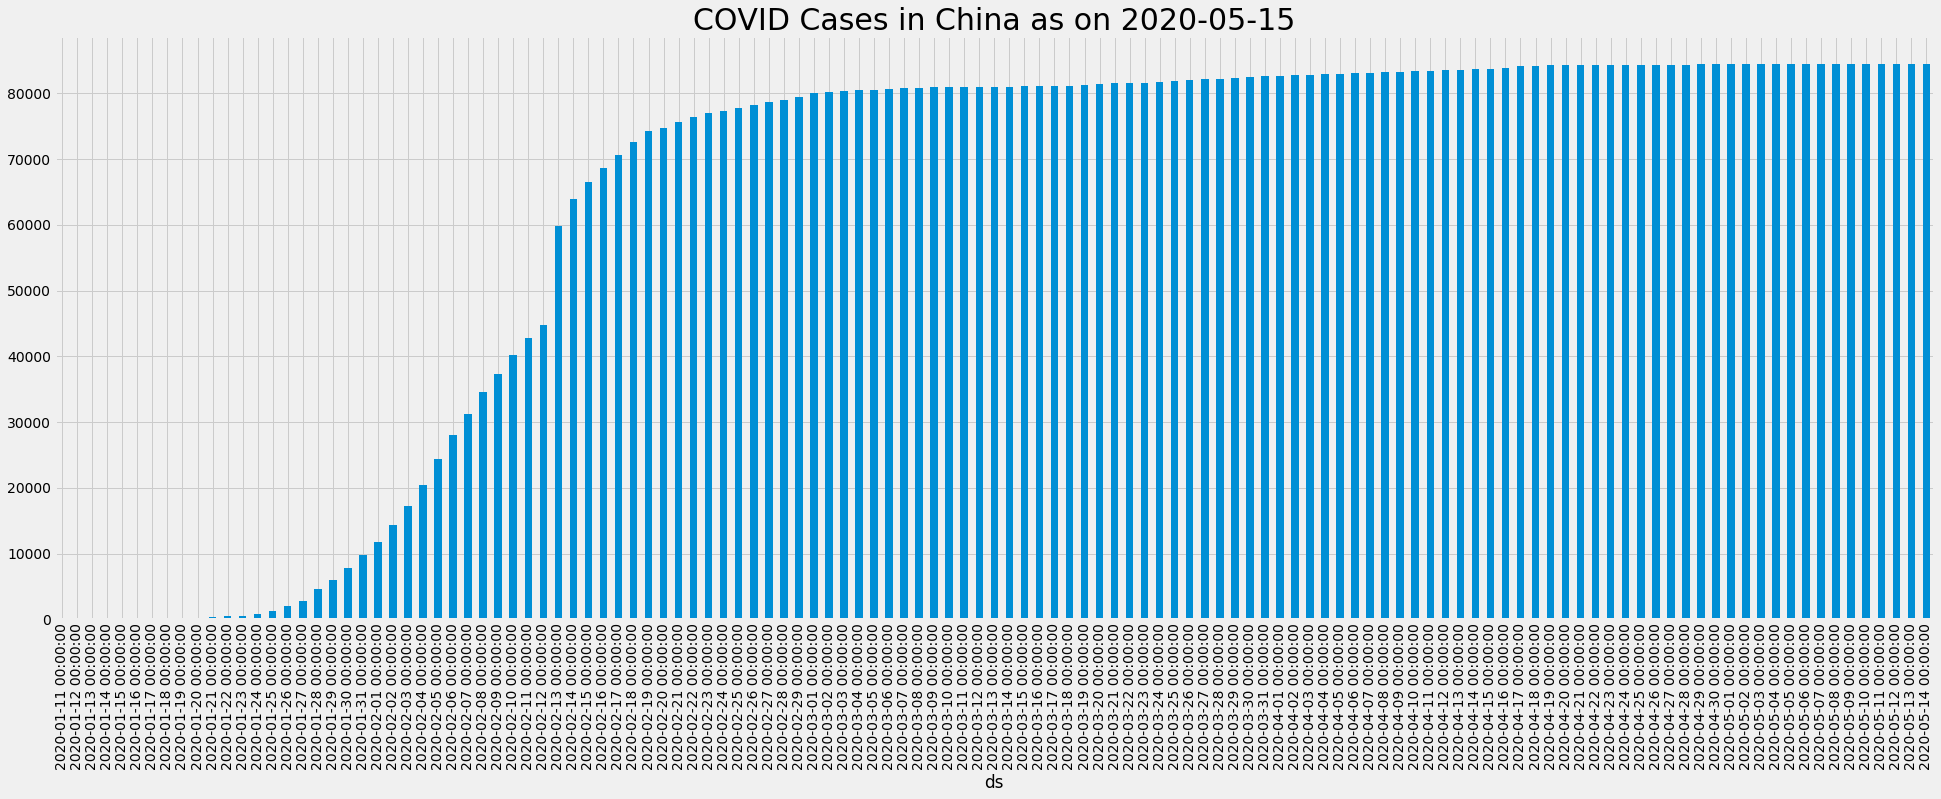

In [34]:
plt.figure(figsize=(30,10))
df[df['Country Name']=='China']['Cumulative Confirmed'].plot(kind='bar')
plt.title(f'COVID Cases in China as on {dt.date.today()}',fontsize=30)
plt.show()

In [35]:
df_China=df[df['Country Name']==('China')]
fig = go.Figure([go.Scatter(x=df_China.index, y=df_China['Cumulative Confirmed'])])
fig.show()

# Visualizing Italy's COVID Cases

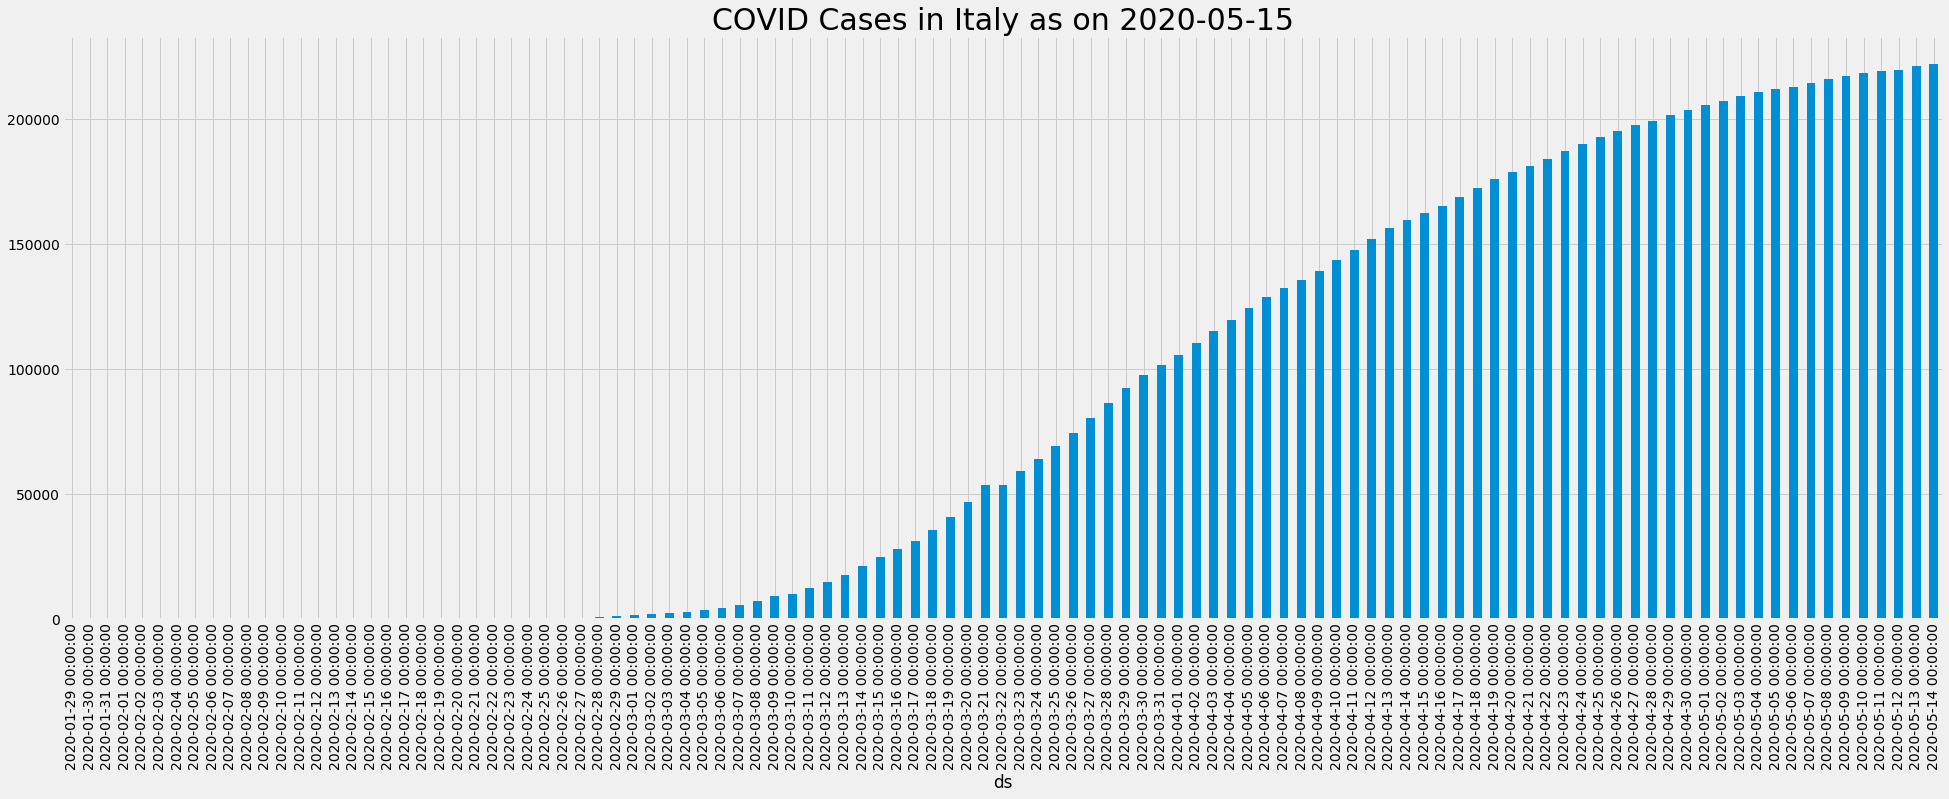

In [36]:
plt.figure(figsize=(30,10))
df[df['Country Name']=='Italy']['Cumulative Confirmed'].plot(kind='bar')
plt.title(f'COVID Cases in Italy as on {dt.date.today()}',fontsize=30)
plt.show()

# Visualizing USA's COVID Cases

In [37]:
df[df['Country Name'].str.startswith('U')]['Country Name'].unique()

array(['Uganda', 'Ukraine', 'United Arab Emirates',
       'United Republic of Tanzania', 'United States of America',
       'United States Virgin Islands', 'Uruguay', 'Uzbekistan'],
      dtype=object)

In [38]:
def plot_COVID_graph(country):
    plt.figure(figsize=(30,7))
    df[df['Country Name']==country]['Cumulative Confirmed'].plot(kind='bar')
    plt.title(f'COVID Cases in {country} as on {dt.date.today()}',fontsize=30)
    plt.show()

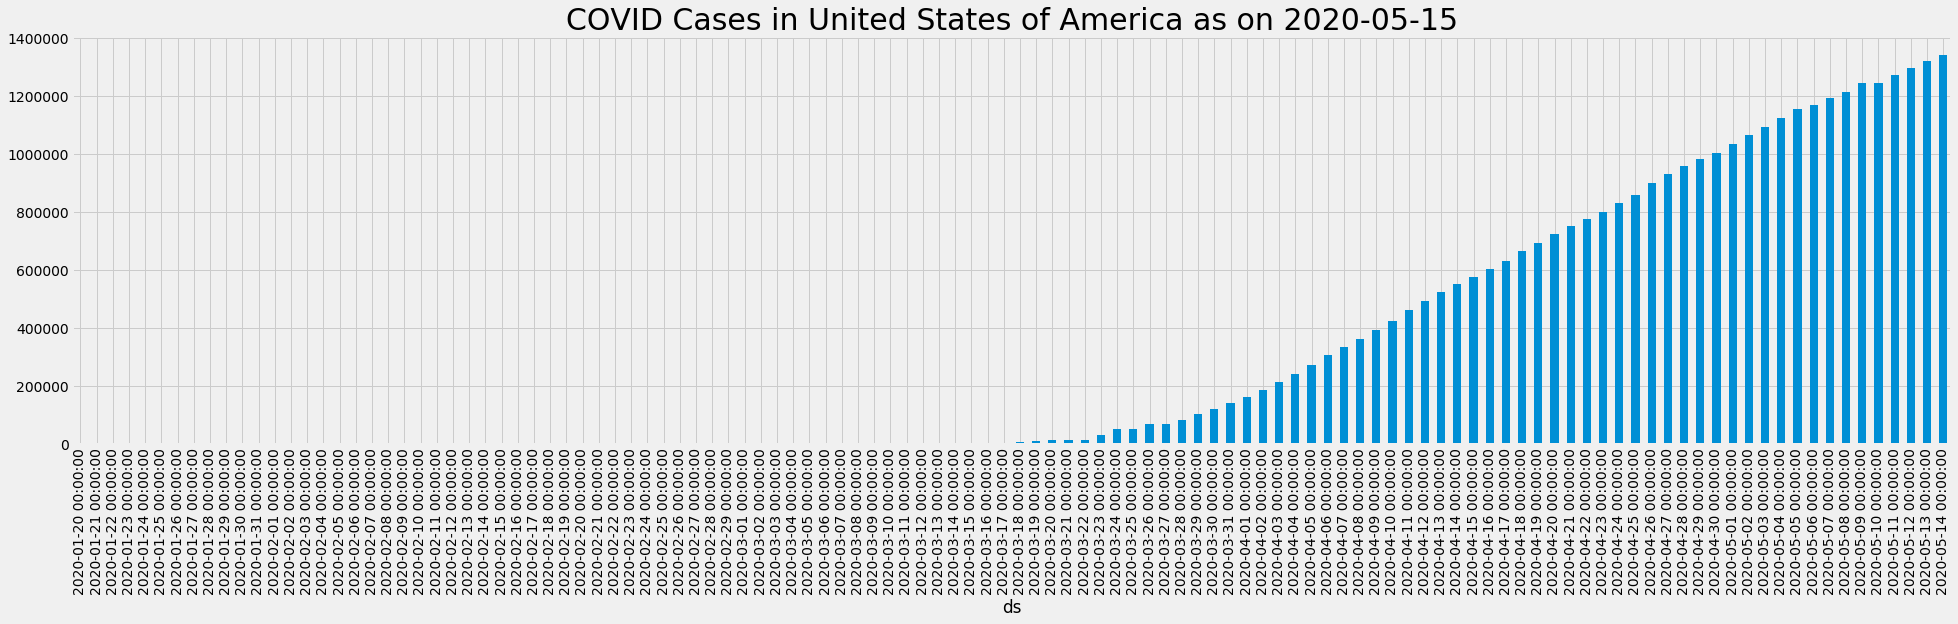

In [39]:
plot_COVID_graph('United States of America')

# Analysis considering all Countries as on Today- Extraction by Date

In [40]:
df_COVID_Today.head()

ds Country Name  Deaths  Cumulative Deaths  Confirmed  \
80  2020-05-14  Afghanistan       6                136        113   
147 2020-05-14      Albania       0                 31          4   
227 2020-05-14      Algeria       7                522        186   
301 2020-05-14      Andorra       1                 49          2   
356 2020-05-14       Angola       0                  2          0   

     Cumulative Confirmed  
80                   5339  
147                   880  
227                  6253  
301                   761  
356                    45

In [41]:
df_COVID_Today.set_index('Country Name')

ds  Deaths  Cumulative Deaths  \
Country Name                                                               
Afghanistan                        2020-05-14       6                136   
Albania                            2020-05-14       0                 31   
Algeria                            2020-05-14       7                522   
Andorra                            2020-05-14       1                 49   
Angola                             2020-05-14       0                  2   
...                                       ...     ...                ...   
Venezuela (Bolivarian Republic of) 2020-05-14       0                 10   
Viet Nam                           2020-05-14       0                  0   
Yemen                              2020-05-14       0                 13   
Zambia                             2020-05-14       0                  7   
Zimbabwe                           2020-05-14       0                  4   

                                    Confirmed  Cumulative Confirmed  
Country Name                                                         
Afghanistan                               113                  5339  
Albania                                     4                   880  
Algeria                                   186                  6253  
Andorra                                     2                   761  
Angola                                      0                    45  
...                                       ...                   ...  
Venezuela (Bolivarian Republic of)         18                   440  
Viet Nam                                    0                   288  
Yemen                                      15                    87  
Zambia                                      5                   446  
Zimbabwe                                    0                    37  

[216 rows x 5 columns]

In [42]:
df_COVID_Today.drop(columns=['ds'],inplace=True)

/Users/sonia/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [43]:
df_COVID_Today.head()

Country Name  Deaths  Cumulative Deaths  Confirmed  Cumulative Confirmed
80   Afghanistan       6                136        113                  5339
147      Albania       0                 31          4                   880
227      Algeria       7                522        186                  6253
301      Andorra       1                 49          2                   761
356       Angola       0                  2          0                    45

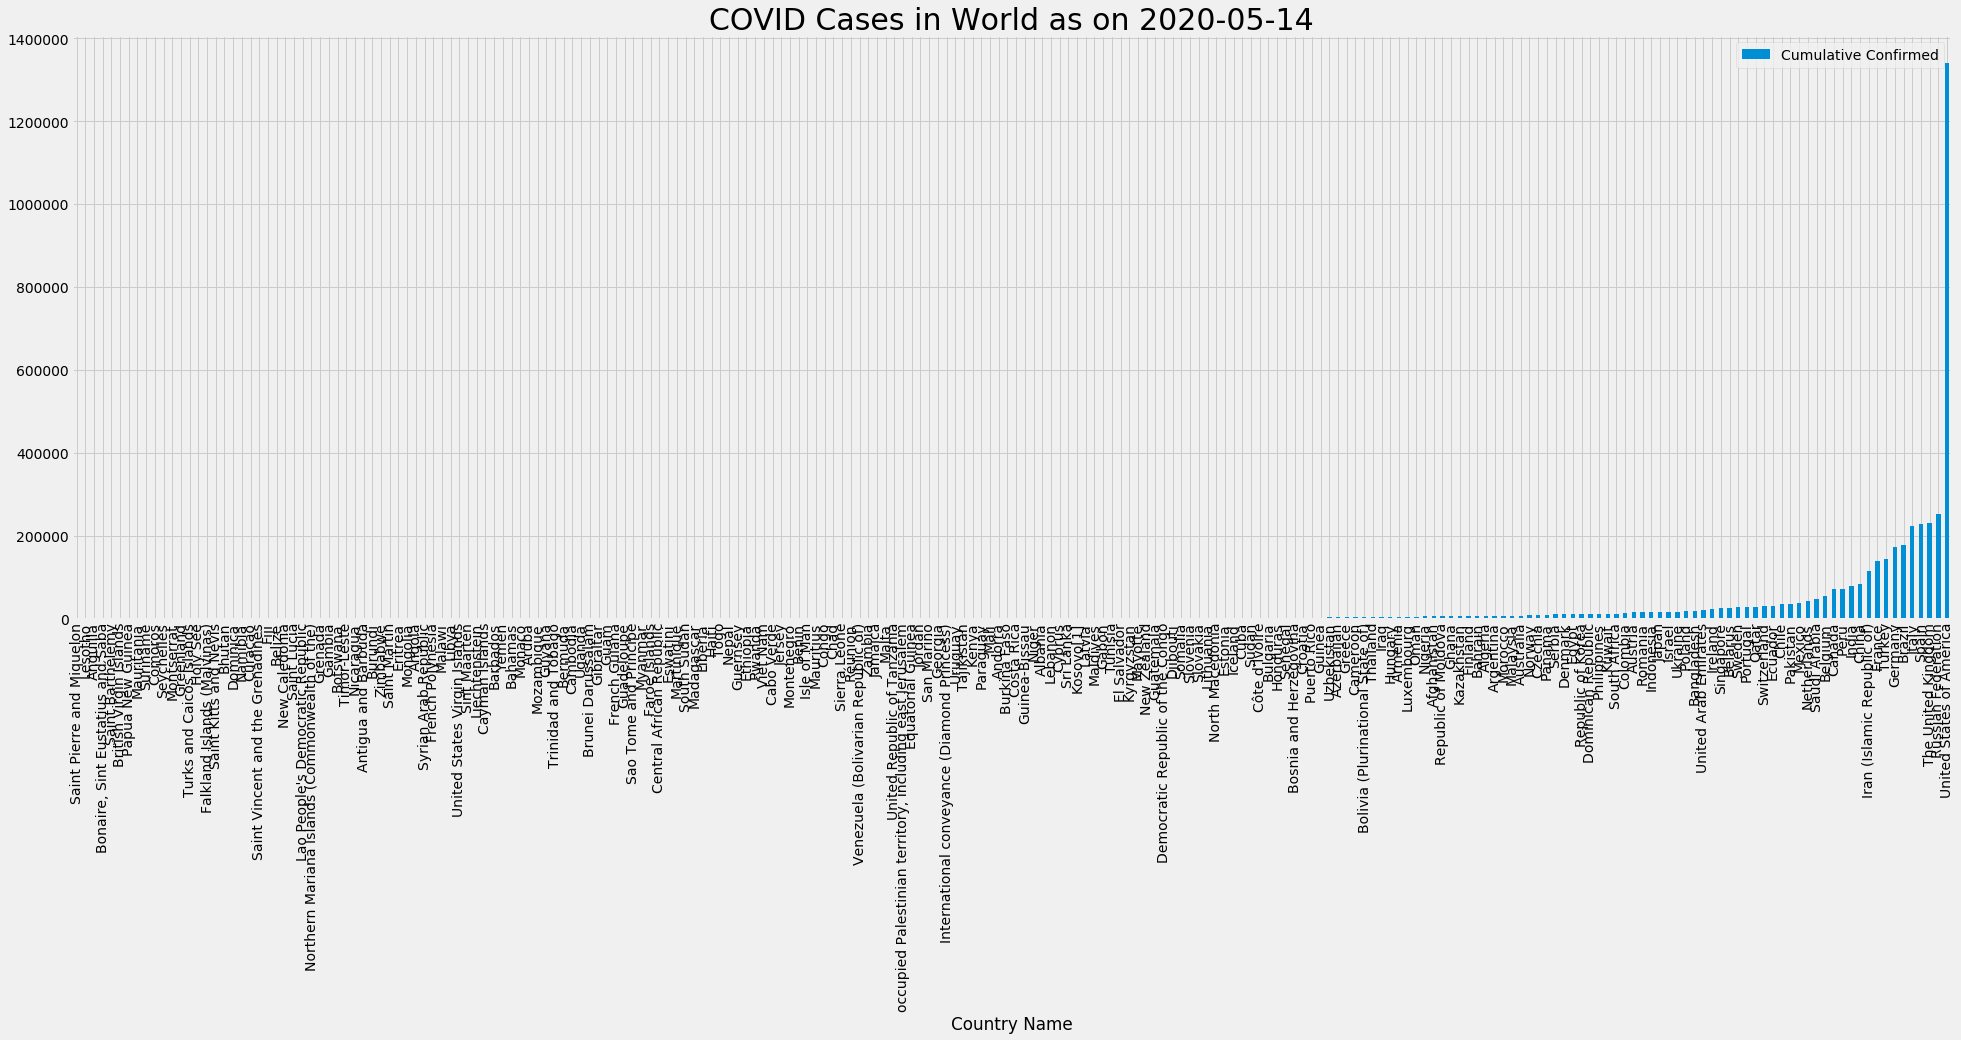

In [44]:
df_COVID_Today.set_index('Country Name').sort_values(by='Cumulative Confirmed').plot(kind='bar',y='Cumulative Confirmed',figsize=(30,10))
plt.title(f'COVID Cases in World as on {dt.date.today()-dt.timedelta(1)}',fontsize=30)
plt.show()

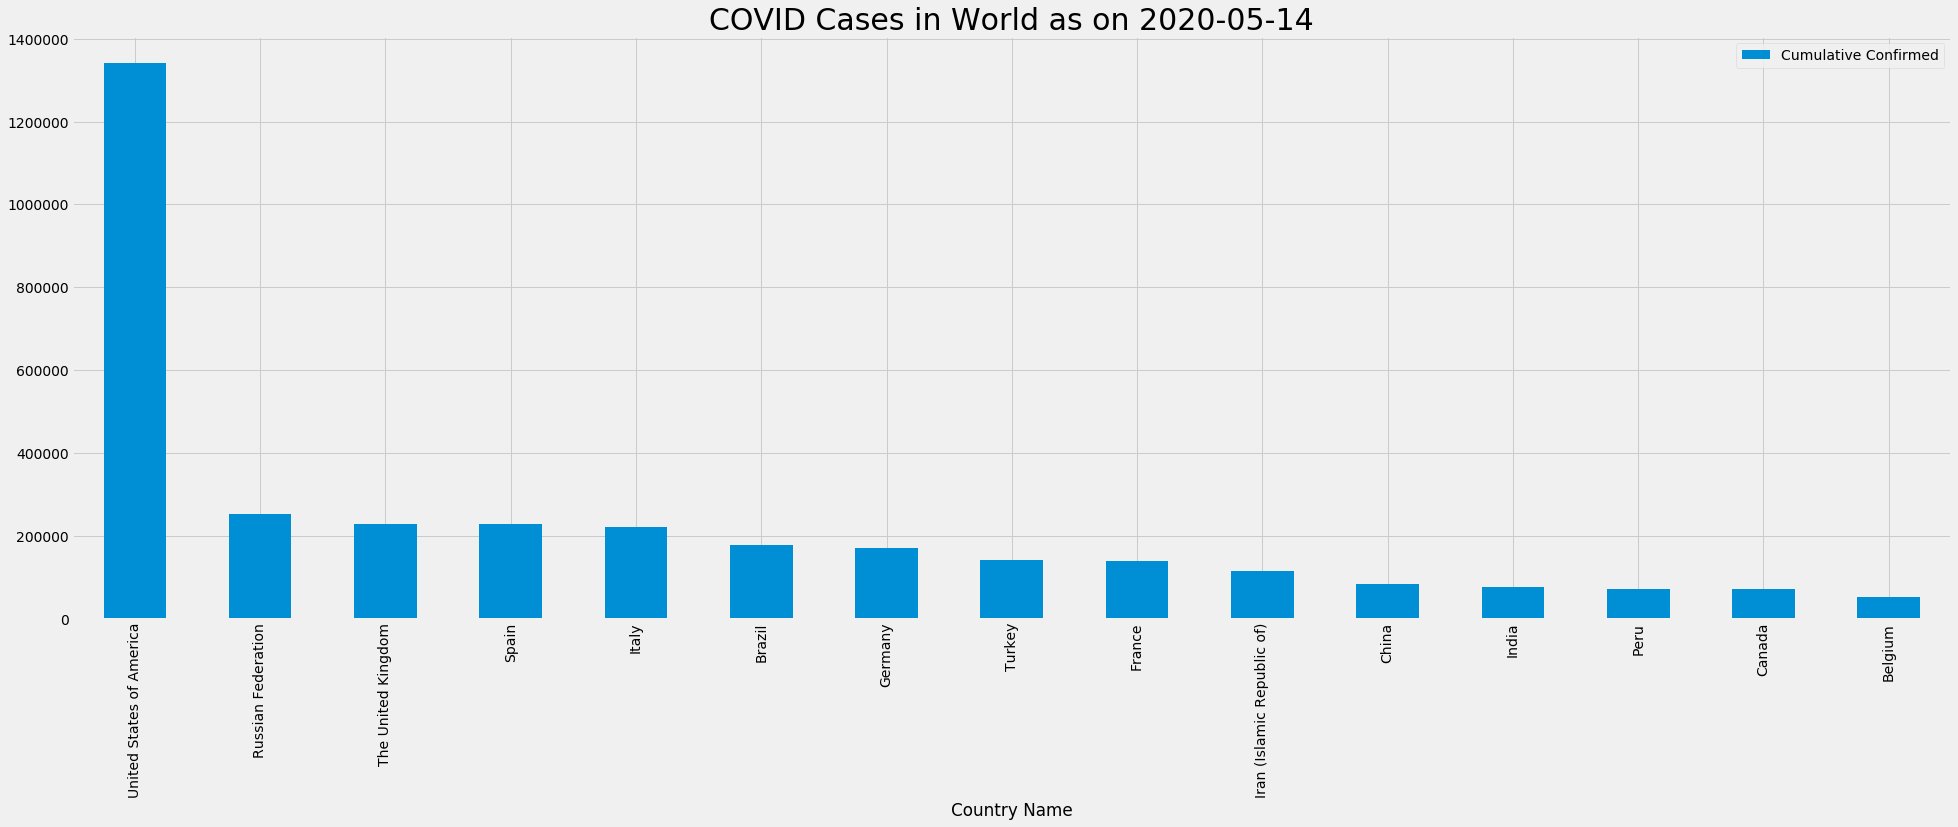

In [45]:
df_COVID_Today.set_index('Country Name').sort_values(by='Cumulative Confirmed',ascending=False)[:15].plot(kind='bar',y='Cumulative Confirmed',figsize=(30,10))
plt.title(f'COVID Cases in World as on {dt.date.today()-dt.timedelta(1)}',fontsize=30)
plt.grid(True)
plt.show()

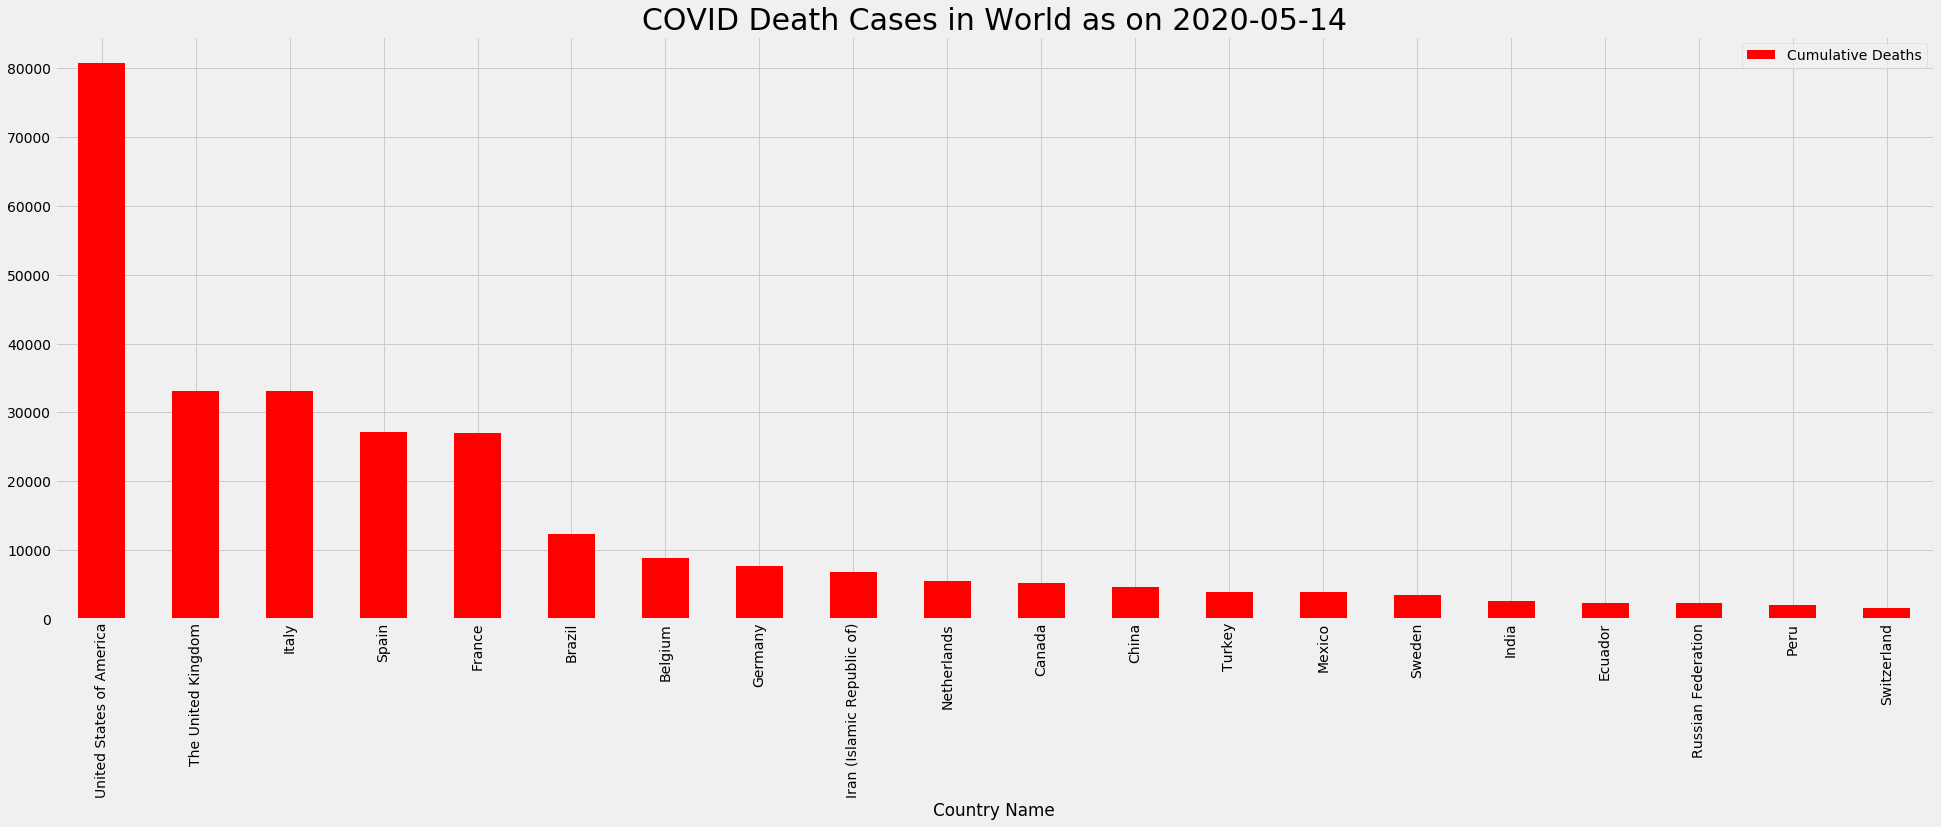

In [46]:
df_COVID_Today.set_index('Country Name').sort_values(by='Cumulative Deaths',ascending=False)[:20].plot(kind='bar',
                                    y='Cumulative Deaths',figsize=(30,10),color='red')
plt.title(f'COVID Death Cases in World as on {dt.date.today()-dt.timedelta(1)}',fontsize=30)
plt.grid(True)
plt.show()

In [47]:
dfT

day Country Country Name Region  Deaths  Cumulative Deaths  \
0      2020-02-24      AF  Afghanistan   EMRO       0                  0   
1      2020-02-25      AF  Afghanistan   EMRO       0                  0   
2      2020-02-26      AF  Afghanistan   EMRO       0                  0   
3      2020-02-27      AF  Afghanistan   EMRO       0                  0   
4      2020-02-28      AF  Afghanistan   EMRO       0                  0   
...           ...     ...          ...    ...     ...                ...   
15025  2020-05-10      ZW     Zimbabwe   AFRO       0                  4   
15026  2020-05-11      ZW     Zimbabwe   AFRO       0                  4   
15027  2020-05-12      ZW     Zimbabwe   AFRO       0                  4   
15028  2020-05-13      ZW     Zimbabwe   AFRO       0                  4   
15029  2020-05-14      ZW     Zimbabwe   AFRO       0                  4   

       Confirmed  Cumulative Confirmed  
0              1                     1  
1              0                     1  
2              0                     1  
3              0                     1  
4              0                     1  
...          ...                   ...  
15025          1                    35  
15026          1                    36  
15027          0                    36  
15028          1                    37  
15029          0                    37  

[15030 rows x 8 columns]

In [48]:
df_COVID_Today[df_COVID_Today['Confirmed']==df_COVID_Today['Confirmed'].max()]

Country Name  Deaths  Cumulative Deaths  Confirmed  \
14522  United States of America    1061              80695      18044   

       Cumulative Confirmed  
14522               1340098

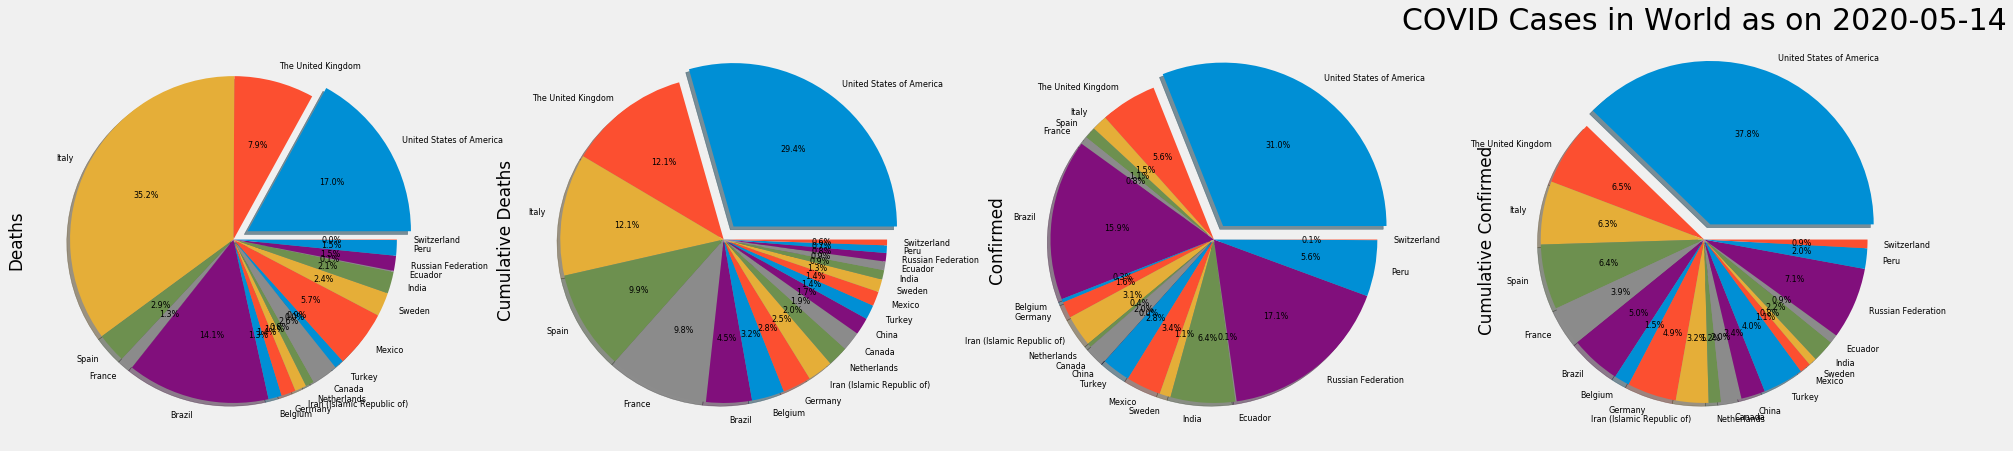

In [49]:
a=np.zeros(20)
a[0]=.1
df_COVID_Today.set_index('Country Name').sort_values(by='Cumulative Deaths',ascending=False)[:20].plot(kind='pie',                                                                                                       
                                    subplots=True,figsize=(30,40),                                                                                                      
                                    label= f'COVID Cases in World as on {dt.date.today()-dt.timedelta(1)}',
                                    explode=a , fontsize=8 ,autopct='%1.1f%%',shadow = True,startangle=0,
                                    legend=False )
plt.title(f'COVID Cases in World as on {dt.date.today()-dt.timedelta(1)}',fontsize=30)
plt.grid(True)
plt.show()

In [50]:
df_COVID_Today['Country Name'].nunique()

216

# MultiParameter Sorting

In [51]:
df_COVID_Today.sort_values(by=['Confirmed','Country Name'],axis=0,inplace=True,ascending=False)

/Users/sonia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [52]:
df_COVID_Today.head()

Country Name  Deaths  Cumulative Deaths  Confirmed  \
14522  United States of America    1061              80695      18044   
11574        Russian Federation      93               2305       9974   
1926                     Brazil     881              12400       9258   
6458                      India     134               2549       3722   
13733        The United Kingdom     494              33186       3242   

       Cumulative Confirmed  
14522               1340098  
11574                252245  
1926                 177589  
6458                  78003  
13733                229709

In [53]:
df_COVID_Today[df_COVID_Today['Country Name'].str.startswith('I')][['Country Name','Confirmed']]

Country Name  Confirmed
6458                                        India       3722
6718                   Iran (Islamic Republic of)       1808
7121                                        Italy        888
6532                                    Indonesia        568
6874                                      Ireland        159
6799                                         Iraq        111
6930                                  Isle of Man          1
6352                                      Iceland          1
7014                                       Israel          0
6632  International conveyance (Diamond Princess)          0

# MultiCondition Extraction

In [54]:
df_COVID_Today[(df_COVID_Today['Country Name'].str.startswith('I')) & (df_COVID_Today.Confirmed<1)][['Country Name','Confirmed']]

Country Name  Confirmed
7014                                       Israel          0
6632  International conveyance (Diamond Princess)          0

# Choloropleth Map for World - Highlighting COVID Death CASE COUNT

In [79]:
dfM = pd.read_csv("Time Series-COVID-19-global-data-11.csv")
dfM['day'] = pd.to_datetime(dfM['day'])
dfM.drop(columns=['Country'],inplace=True)

dfM = dfM.rename(columns= {"Country Name" : "Country"})
total_list = dfM.groupby('Country').sum()['Deaths']

country_list = dfM["Country"].tolist()
country_set = set(country_list)
country_list = list(country_set)
country_list.sort()

new_df = pd.DataFrame(list(zip(country_list, total_list)), 
               columns =['Country', 'Total_Cases'])

colors = ["#F9F9F5", "#FAFAE6", "#FCFCCB", "#FCFCAE",  "#FCF1AE", "#FCEA7D", "#FCD97D",
          "#FCCE7D", "#FCC07D", "#FEB562", "#F9A648",  "#F98E48", "#FD8739", "#FE7519",
          "#FE5E19", "#FA520A", "#FA2B0A", "#9B1803",  "#861604", "#651104", "#570303",]


fig = go.Figure(data=go.Choropleth(
    locationmode = "country names",
    locations = new_df['Country'],
    z = new_df['Total_Cases'],
    text = new_df['Total_Cases'],
    colorscale = colors,
    #autocolorscale=True,#
    reversescale=False,
    colorbar_title = 'Reported Death Covid-19 Cases',
))

fig.update_layout(
    title_text='Reported Death Covid-19 Cases',
    geo=dict(
        showcoastlines=True,
    ),
)
s='first_figure'+str(datetime.datetime.now())+'.html'
fig.write_html(s, auto_open=True)


# Case Study 3: Base Model for Time Series Prediction of COVID Cases in India

# Time Series Prediction of Covid Cases in India

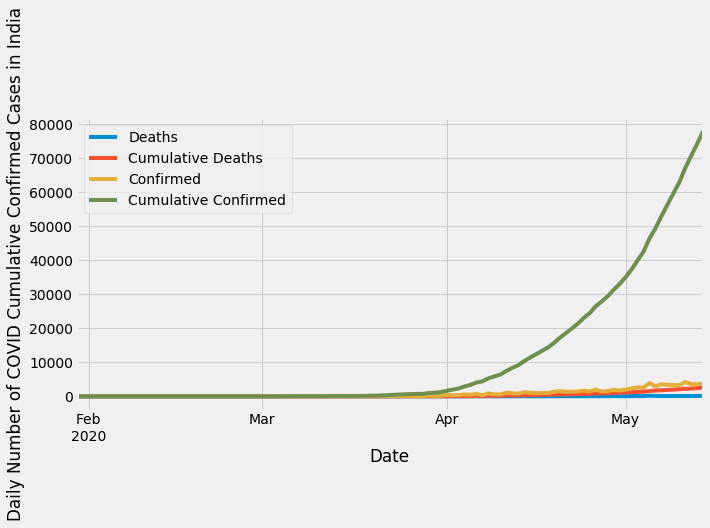

In [56]:
ax = df_India.plot(figsize=(10, 5))
ax.set_ylabel('Daily Number of COVID Cumulative Confirmed Cases in India')
ax.set_xlabel('Date')
plt.show()

In [57]:
df_India.reset_index(inplace=True)

In [58]:
df_India.tail(3)

ds Country Name  Deaths  Cumulative Deaths  Confirmed  \
103 2020-05-12        India      87               2293       3604   
104 2020-05-13        India     122               2415       3525   
105 2020-05-14        India     134               2549       3722   

     Cumulative Confirmed  
103                 70756  
104                 74281  
105                 78003

In [59]:
df_temp=df_India.filter(['ds','Cumulative Confirmed'])

In [60]:
df_temp.rename(columns={'Cumulative Confirmed':'y'},inplace=True)

In [61]:
df_temp.tail(3)

ds      y
103 2020-05-12  70756
104 2020-05-13  74281
105 2020-05-14  78003

In [62]:
my_model = Prophet(interval_width=0.95)
my_model.fit(df_temp)
future_dates = my_model.make_future_dataframe(periods=32, freq='D')
future_dates.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
133 2020-06-11
134 2020-06-12
135 2020-06-13
136 2020-06-14
137 2020-06-15

In [63]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds           yhat     yhat_lower     yhat_upper
133 2020-06-11  138948.374362  126508.192323  152288.057548
134 2020-06-12  140884.163383  127598.972675  155195.228186
135 2020-06-13  143317.860643  129597.635245  159087.778106
136 2020-06-14  145831.893440  131574.677359  161691.583212
137 2020-06-15  148331.298460  133683.069096  165070.697134

In [80]:
forecast.tail()

ds          trend     yhat_lower     yhat_upper    trend_lower  \
133 2020-06-11  138689.777864  126508.192323  152288.057548  126270.721401   
134 2020-06-12  141107.423063  127598.972675  155195.228186  128016.758151   
135 2020-06-13  143525.068262  129597.635245  159087.778106  129744.023291   
136 2020-06-14  145942.713460  131574.677359  161691.583212  131655.261031   
137 2020-06-15  148360.358659  133683.069096  165070.697134  133429.704074   

       trend_upper  additive_terms  additive_terms_lower  \
133  151766.566298      258.596498            258.596498   
134  155094.318121     -223.259680           -223.259680   
135  158568.798413     -207.207619           -207.207619   
136  161711.792927     -110.820020           -110.820020   
137  165181.718969      -29.060199            -29.060199   

     additive_terms_upper      weekly  weekly_lower  weekly_upper  \
133            258.596498  258.596498    258.596498    258.596498   
134           -223.259680 -223.259680   -223.259680   -223.259680   
135           -207.207619 -207.207619   -207.207619   -207.207619   
136           -110.820020 -110.820020   -110.820020   -110.820020   
137            -29.060199  -29.060199    -29.060199    -29.060199   

     multiplicative_terms  multiplicative_terms_lower  \
133                   0.0                         0.0   
134                   0.0                         0.0   
135                   0.0                         0.0   
136                   0.0                         0.0   
137                   0.0                         0.0   

     multiplicative_terms_upper           yhat  
133                         0.0  138948.374362  
134                         0.0  140884.163383  
135                         0.0  143317.860643  
136                         0.0  145831.893440  
137                         0.0  148331.298460

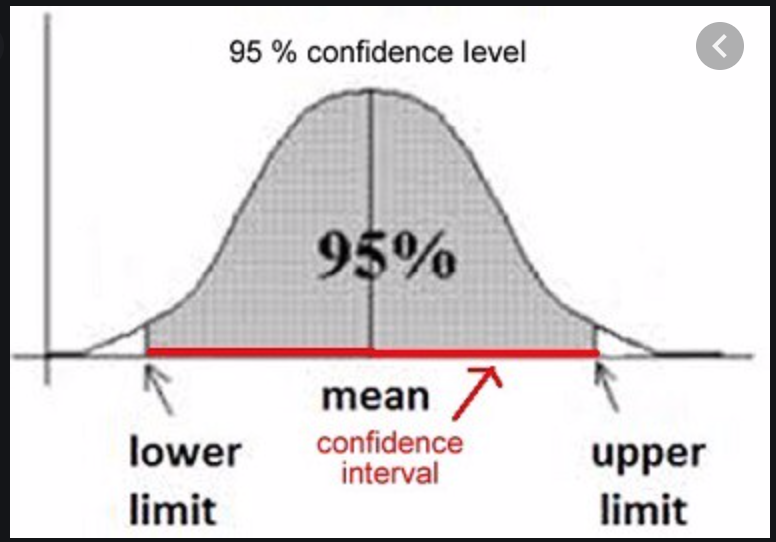

In [64]:
from IPython.display  import Image
Image(filename ='CI.png',width=500  )

In [81]:
df_India.tail(1)

ds Country Name  Deaths  Cumulative Deaths  Confirmed  \
105 2020-05-14        India     134               2549       3722   

     Cumulative Confirmed  
105                 78003

In [66]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(1)

ds          yhat     yhat_lower     yhat_upper
137 2020-06-15  148331.29846  133683.069096  165070.697134

In [67]:
df_bar=pd.DataFrame(data=[df_India.iloc[df_India.shape[0]-1]['Cumulative Confirmed']],columns=['Current'])

In [68]:
df_bar

Current
0    78003

In [69]:
df_bar_p=pd.DataFrame(data=[np.ceil(forecast.iloc[forecast.shape[0]-1]['yhat'])],columns=['Predicted'])

In [70]:
df_bar_p

Predicted
0   148332.0

# Concatenation and Transpose

In [71]:
df_bar = pd.concat([df_bar, df_bar_p],axis='columns')
df_bar.rename(columns={'Current':pd.to_datetime('14-05-20'),'Predicted':pd.to_datetime('15-06-20')},inplace=True)

In [72]:
df_bar

2020-05-14  2020-06-15
0       78003    148332.0

In [73]:
df_bar = df_bar.transpose()
df_bar.rename(columns={0:'Confirmed Cases'},inplace=True)

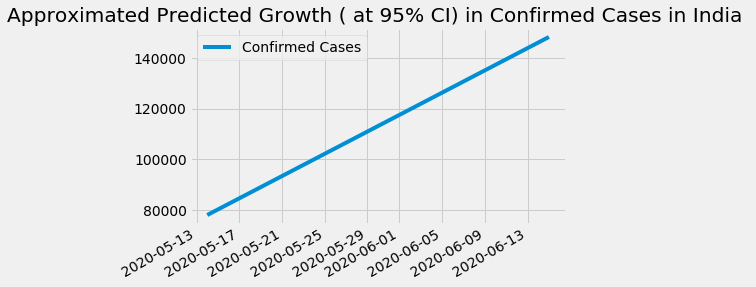

In [74]:
df_bar.plot(kind='line',title='Approximated Predicted Growth ( at 95% CI) in Confirmed Cases in India ')
plt.show()

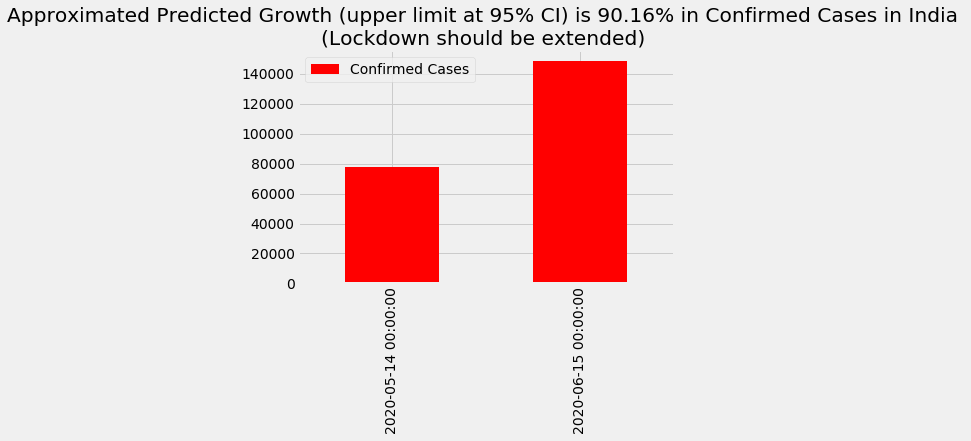

In [75]:
rate = round((df_bar['Confirmed Cases'][1]-df_bar['Confirmed Cases'][0])*100/(df_bar['Confirmed Cases'][0]),2)

df_bar.plot(kind='bar',
title=f'Approximated Predicted Growth (upper limit at 95% CI) is {rate}% in Confirmed Cases in India \n(Lockdown should be extended) ',
           color='red')
plt.show()



# Visualization of Predicted Growth in COVID Cases in India

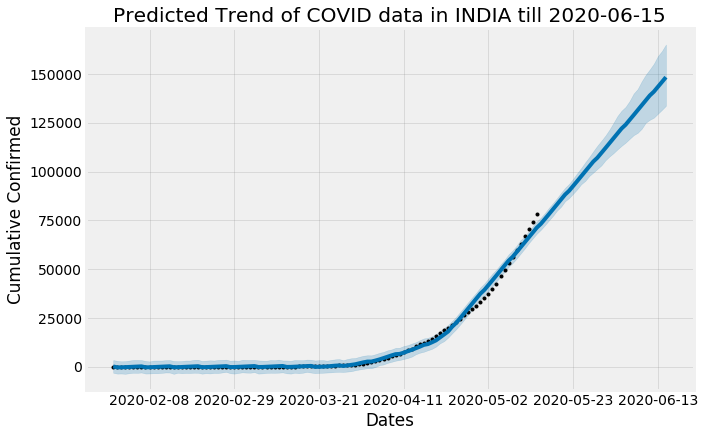

In [76]:
my_model.plot(forecast,uncertainty=True,xlabel='Dates',ylabel='Cumulative Confirmed')
s='Predicted Trend of COVID data in ' +('India ').upper() + str('till 2020-06-15')
plt.title(s)
plt.show()